In [62]:
!pip install kaggle

/bin/sh: pip: command not found
/bin/sh: pip: command not found


In [2]:
! mkdir -p ~/.kaggle/
! mv kaggle.json ~/.kaggle/

mv: rename kaggle.json to /Users/fengyongxiang/.kaggle/kaggle.json: No such file or directory


In [3]:
! mkdir -p ~/.kaggle/

In [6]:
! kaggle competitions download -c house-prices-advanced-regression-techniques

  0%|                                                | 0.00/199k [00:00<?, ?B/s]
100%|████████████████████████████████████████| 199k/199k [00:00<00:00, 2.86MB/s]


In [8]:
!chmod 600 /Users/fengyongxiang/.kaggle/kaggle.json

In [9]:
! unzip house-prices-advanced-regression-techniques.zip

Archive:  house-prices-advanced-regression-techniques.zip
  inflating: data_description.txt    
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


We import the data form the database,and see it has how many features and sampeles. Then we show some graphs about some of features.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [2]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

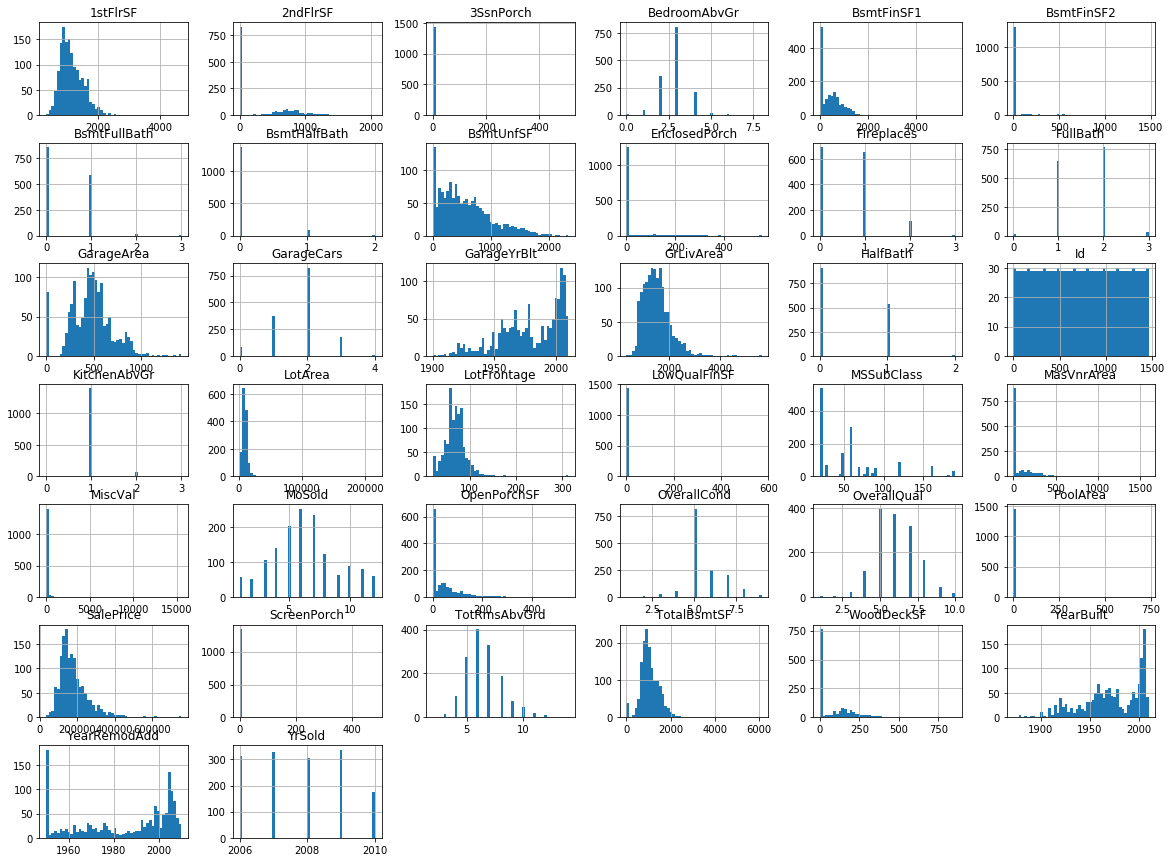

In [3]:
train.hist(bins=50, figsize=(20,15))
plt.show()

In [4]:
train_copy = train.copy()
corr_train = train_copy.corr()
corr_train['SalePrice'].sort_values(ascending = False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

In [5]:
train_ = train.drop('SalePrice', axis = 1)
train_lable = train['SalePrice'].copy()

Now we deal with missing data. We see some data are number and some are object. So we deal with number data first, we use imputer method to let missing data as the median of all it data. Then we convert objects to number and let them as same as number.

In [6]:
imputer = SimpleImputer(strategy = 'median')

item = ['Alley','MSZoning','Street', 'LotShape',
'LandContour',      
'Utilities',       
'LotConfig',        
'LandSlope',        
'Neighborhood',     
'Condition1',       
'Condition2',       
'BldgType',         
'HouseStyle',
'RoofStyle',        
'RoofMatl',       
'Exterior1st',     
'Exterior2nd',      
'MasVnrType',     
'ExterQual',       
'ExterCond',       
'Foundation',   
'BsmtQual',        
'BsmtCond',  
'BsmtExposure',    
'BsmtFinType1',
'BsmtFinType2',
'Heating',          
'HeatingQC',      
'CentralAir',      
'Electrical',
'KitchenQual',
'FireplaceQu',
'Functional',
'GarageType',
'GarageFinish',
'GarageQual',      
'GarageCond',    
'PavedDrive',
'PoolQC',           
'Fence',           
'MiscFeature',
'SaleType',        
'SaleCondition'   
]

train_copy.drop(columns=item, inplace=True)

imputer.fit(train_copy)
imputer.statistics_

X = imputer.transform(train_copy)

house_num = pd.DataFrame(X, columns=train_copy.columns)

In [7]:
house_num.info()
house_copy = train.copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
Id               1460 non-null float64
MSSubClass       1460 non-null float64
LotFrontage      1460 non-null float64
LotArea          1460 non-null float64
OverallQual      1460 non-null float64
OverallCond      1460 non-null float64
YearBuilt        1460 non-null float64
YearRemodAdd     1460 non-null float64
MasVnrArea       1460 non-null float64
BsmtFinSF1       1460 non-null float64
BsmtFinSF2       1460 non-null float64
BsmtUnfSF        1460 non-null float64
TotalBsmtSF      1460 non-null float64
1stFlrSF         1460 non-null float64
2ndFlrSF         1460 non-null float64
LowQualFinSF     1460 non-null float64
GrLivArea        1460 non-null float64
BsmtFullBath     1460 non-null float64
BsmtHalfBath     1460 non-null float64
FullBath         1460 non-null float64
HalfBath         1460 non-null float64
BedroomAbvGr     1460 non-null float64
KitchenAbvGr     1460 non-null floa

In [9]:
train_copy = train.select_dtypes('object').copy()
train_copy = train[['MSZoning','Street','Utilities','Neighborhood','LotShape']].copy()
train_copy.info()

col1 = 'MSZoning'
col2 = 'Street'
col3 = 'Utilities'
col4 = 'Neighborhood'
col5 = 'LotShape'

trans_text = pd.get_dummies(train_copy[['MSZoning','Street','Utilities','Neighborhood','LotShape']])

df = pd.concat([house_num,trans_text],axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 5 columns):
MSZoning        1460 non-null object
Street          1460 non-null object
Utilities       1460 non-null object
Neighborhood    1460 non-null object
LotShape        1460 non-null object
dtypes: object(5)
memory usage: 57.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
Id                      1460 non-null float64
MSSubClass              1460 non-null float64
LotFrontage             1460 non-null float64
LotArea                 1460 non-null float64
OverallQual             1460 non-null float64
OverallCond             1460 non-null float64
YearBuilt               1460 non-null float64
YearRemodAdd            1460 non-null float64
MasVnrArea              1460 non-null float64
BsmtFinSF1              1460 non-null float64
BsmtFinSF2              1460 non-null float64
BsmtUnfSF               1460 non-null float64
TotalBsmt

In [10]:
df_corr = df.corr()
df_corr['SalePrice'].sort_values(ascending = False)

SalePrice               1.000000
OverallQual             0.790982
GrLivArea               0.708624
GarageCars              0.640409
GarageArea              0.623431
TotalBsmtSF             0.613581
1stFlrSF                0.605852
FullBath                0.560664
TotRmsAbvGrd            0.533723
YearBuilt               0.522897
YearRemodAdd            0.507101
MasVnrArea              0.472614
Fireplaces              0.466929
GarageYrBlt             0.466754
Neighborhood_NridgHt    0.402149
BsmtFinSF1              0.386420
LotFrontage             0.334771
Neighborhood_NoRidge    0.330424
WoodDeckSF              0.324413
2ndFlrSF                0.319334
OpenPorchSF             0.315856
HalfBath                0.284108
LotArea                 0.263843
MSZoning_RL             0.245063
BsmtFullBath            0.227122
LotShape_IR1            0.223284
Neighborhood_StoneBr    0.215363
BsmtUnfSF               0.214479
BedroomAbvGr            0.168213
Neighborhood_Somerst    0.140058
          

In [11]:
df_feature = df[['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF',
                 '1stFlrSF','FullBath','TotRmsAbvGrd','YearBuilt','YearRemodAdd']]
df_lable = df[['SalePrice']]
df_feature.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd
0,7.0,1710.0,2.0,548.0,856.0,856.0,2.0,8.0,2003.0,2003.0
1,6.0,1262.0,2.0,460.0,1262.0,1262.0,2.0,6.0,1976.0,1976.0
2,7.0,1786.0,2.0,608.0,920.0,920.0,2.0,6.0,2001.0,2002.0
3,7.0,1717.0,3.0,642.0,756.0,961.0,1.0,7.0,1915.0,1970.0
4,8.0,2198.0,3.0,836.0,1145.0,1145.0,2.0,9.0,2000.0,2000.0


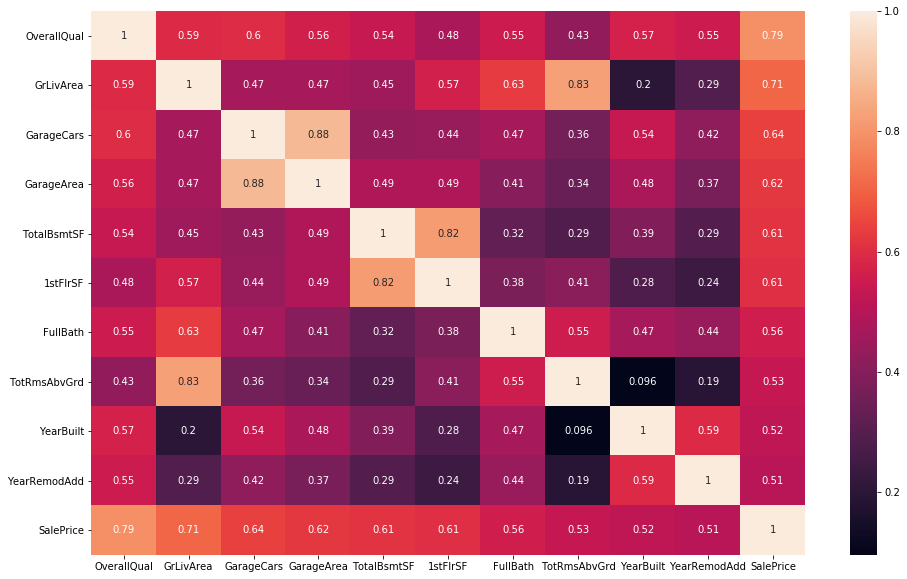

In [12]:
import seaborn as sns

plt.figure(figsize=(16,10))
df_heat = df[['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF',
                 '1stFlrSF','FullBath','TotRmsAbvGrd','YearBuilt','YearRemodAdd','SalePrice']]
df_heat_corr = df_heat.corr()
df_heat = sns.heatmap(df_heat_corr,annot= True)
plt.show()

In [13]:
df_train = df.drop(labels='SalePrice',axis=1)
df_train.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,LotShape_IR1,LotShape_IR2,LotShape_IR3,LotShape_Reg
0,1.0,60.0,65.0,8450.0,7.0,5.0,2003.0,2003.0,196.0,706.0,...,0,0,0,0,0,0,0,0,0,1
1,2.0,20.0,80.0,9600.0,6.0,8.0,1976.0,1976.0,0.0,978.0,...,0,0,0,0,0,1,0,0,0,1
2,3.0,60.0,68.0,11250.0,7.0,5.0,2001.0,2002.0,162.0,486.0,...,0,0,0,0,0,0,1,0,0,0
3,4.0,70.0,60.0,9550.0,7.0,5.0,1915.0,1970.0,0.0,216.0,...,0,0,0,0,0,0,1,0,0,0
4,5.0,60.0,84.0,14260.0,8.0,5.0,2000.0,2000.0,350.0,655.0,...,0,0,0,0,0,0,1,0,0,0


We divide data into four parts. one is all features training data, two is all features test data, three is high correlation features training data and four is high correlation features test data. And standar features to avoid some not outstanding features influence result.

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

x_train,x_test,y_train,y_test = train_test_split(df_train,df_lable, test_size = 0.4)
x_feature_train,x_feature_test,y_feature_train,y_feature_test = train_test_split(df_feature,df_lable, test_size = 0.4)

y_train = y_train.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)
y_feature_train = y_feature_train.values.reshape(-1,1)
y_feature_test = y_feature_test.values.reshape(-1,1)

Standar_x = StandardScaler()
Standar_y = StandardScaler()

x_train = Standar_x.fit_transform(x_train)
x_test = Standar_x.fit_transform(x_test)
x_feature_train = Standar_x.fit_transform(x_feature_train)
x_feature_test = Standar_y.fit_transform(x_feature_test)

y_train = Standar_y.fit_transform(y_train)
y_test = Standar_y.fit_transform(y_test)
y_feature_train = Standar_y.fit_transform(y_feature_train)
y_feature_test = Standar_y.fit_transform(y_feature_test)

Linear Regression

In [15]:
from sklearn.linear_model import LinearRegression

linear_train = LinearRegression()
linear_feature = LinearRegression()

linear_train.fit(x_train,y_train)
linear_feature.fit(x_feature_train,y_feature_train)

print('linear_train intercept and corefficient:',linear_train.intercept_,linear_train.coef_)
print('linear_feature intercept and corefficient:',linear_feature.intercept_,linear_feature.coef_)


linear_train intercept and corefficient: [0.00034381] [[ 1.27448964e-02 -1.16296866e-01 -2.49859128e-02  9.70805095e-02
   2.06136435e-01  6.85505663e-02  1.10338464e-01  3.76065716e-03
   3.73742163e-02 -5.65186414e+11 -1.80820787e+11 -5.36890856e+11
   5.46514943e+11 -7.64025781e+11 -8.68313970e+11 -1.00082718e+11
   1.06223630e+12  6.46650422e-02  3.42577955e-02  3.04108920e-02
  -2.57253017e-02 -6.52855537e-02 -3.44800139e-02  2.87167057e-02
   1.74747528e-02  2.29096738e-02  1.67089407e-01 -7.29545958e-02
   1.61729139e-02  1.41587813e-02 -1.30879290e-02  2.30235917e-02
   4.93072032e-02 -3.49133058e-04 -7.07660454e-03 -1.95589417e-02
  -9.07695741e-03  1.49118032e+11  3.39188503e+11  2.01325741e+11
   7.21336804e+11  6.32368001e+11  2.26580367e+11  2.26580367e+11
  -6.72721327e+11 -6.72721327e+11  1.48215865e+11  4.30577395e+10
   1.35458464e+11  2.62991815e+11  1.90457939e+11  4.00130627e+11
   2.49734889e+11  3.14504293e+11  2.95816385e+11  1.59906033e+11
   1.21297557e+11  2.1

In [16]:
from sklearn import metrics
import numpy as np
train_predict = linear_train.predict(x_test)
feature_predict = linear_feature.predict(x_feature_test)

train_predict = train_predict.reshape(-1,1)
feature_predict = feature_predict.reshape(-1,1)

print('linear_train MAE:', metrics.mean_squared_error(y_test,train_predict))
print('linear_train RMAE:',np.sqrt(metrics.mean_squared_error(y_test,train_predict)))
print('linear_feature MAE:',metrics.mean_squared_error(y_feature_test,feature_predict))
print('linear_feature RMAE:',np.sqrt(metrics.mean_squared_error(y_feature_test,feature_predict)))

linear_train MAE: 5.9644455928079355e+22
linear_train RMAE: 244222144630.8245
linear_feature MAE: 0.20771067660978224
linear_feature RMAE: 0.4557528679117469


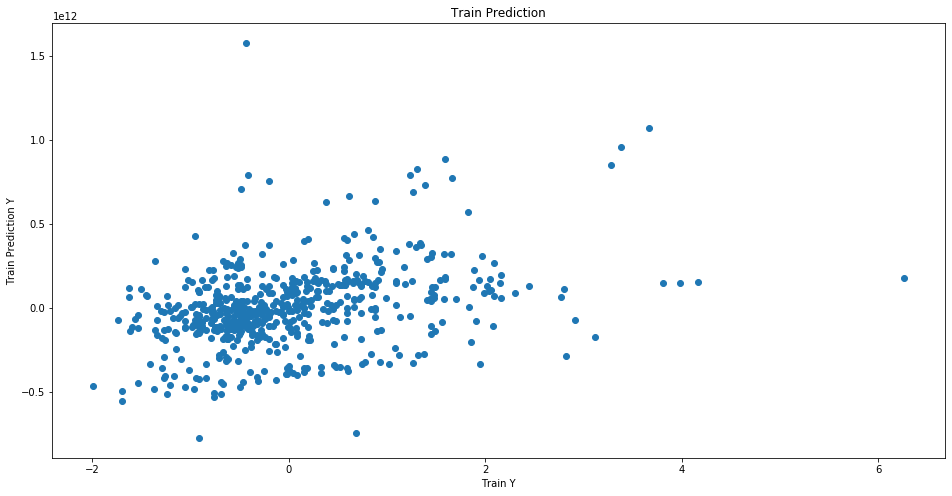

In [17]:
plt.figure(figsize=(16,8))
plt.scatter(y_test,train_predict)
plt.xlabel('Train Y')
plt.ylabel('Train Prediction Y')
plt.title('Train Prediction')
plt.show()

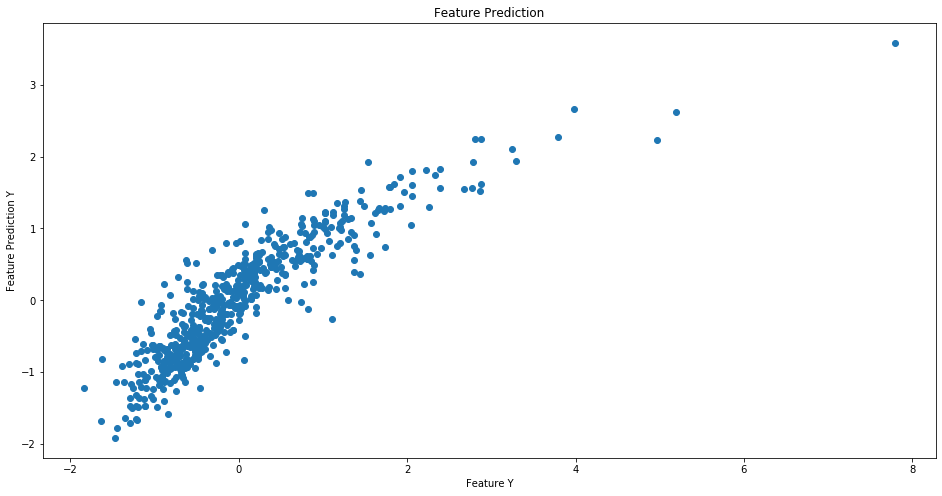

In [18]:
plt.figure(figsize=(16,8))
plt.scatter(y_feature_test,feature_predict)
plt.xlabel('Feature Y')
plt.ylabel('Feature Prediction Y')
plt.title('Feature Prediction')
plt.show()

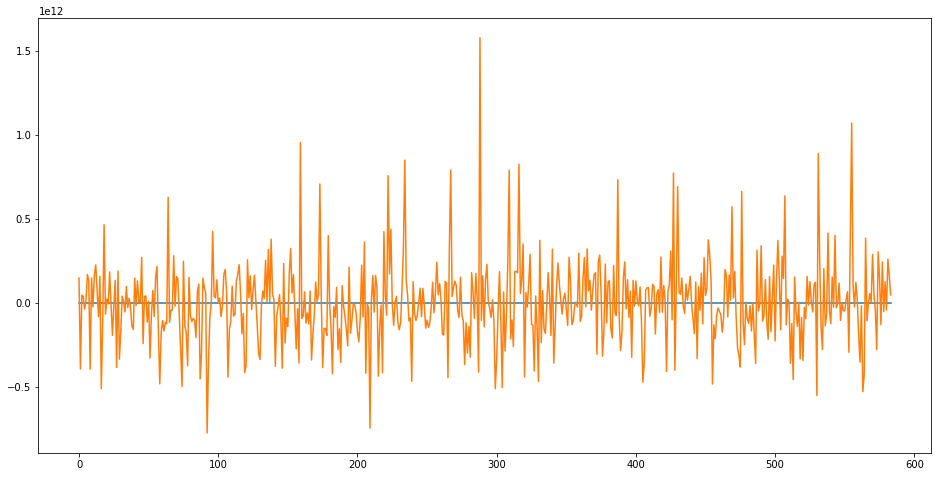

In [19]:
plt.figure(figsize=(16,8))
plt.plot(y_test,label = 'Train')
plt.plot(train_predict,label = 'Train Prediction')
plt.show()

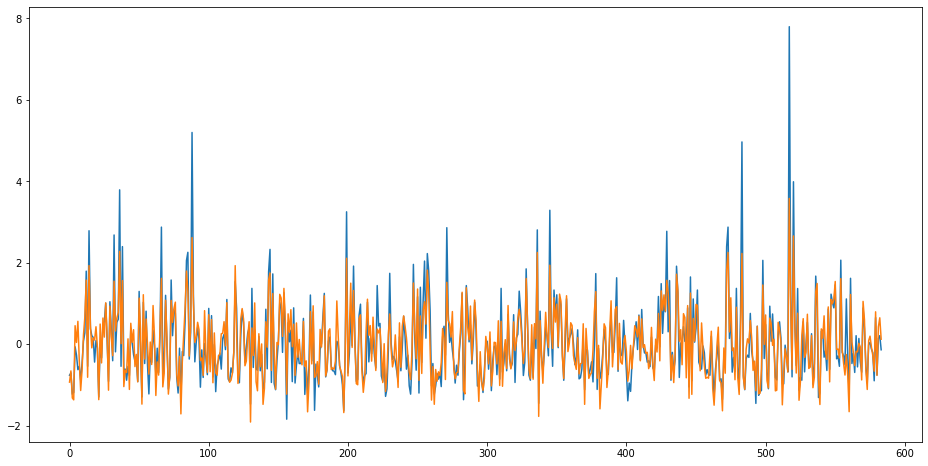

In [20]:
plt.figure(figsize=(16,8))
plt.plot(y_feature_test,label = 'Feature')
plt.plot(feature_predict,label = 'Feature Prediction')
plt.show()

Decision Tree

In [21]:
from sklearn.tree import DecisionTreeRegressor

train_dt = DecisionTreeRegressor(random_state=50)
feature_dt = DecisionTreeRegressor(random_state=50)

train_dt.fit(x_train,y_train)
feature_dt.fit(x_feature_train,y_feature_train)

train_dt_predict = train_dt.predict(x_test)
feature_dt_predict = feature_dt.predict(x_feature_test)

print('train_dt_predict MAE:', metrics.mean_squared_error(y_test,train_dt_predict))
print('train_dt_predict RMAE:',np.sqrt(metrics.mean_squared_error(y_test,train_dt_predict)))
print('feature_dt_predict MAE:',metrics.mean_squared_error(y_feature_test,feature_dt_predict))
print('feature_dt_predict RMAE:',np.sqrt(metrics.mean_squared_error(y_feature_test,feature_dt_predict)))

train_dt_predict MAE: 0.37786669502685527
train_dt_predict RMAE: 0.6147086261204208
feature_dt_predict MAE: 0.2933895812624477
feature_dt_predict RMAE: 0.5416544851309252


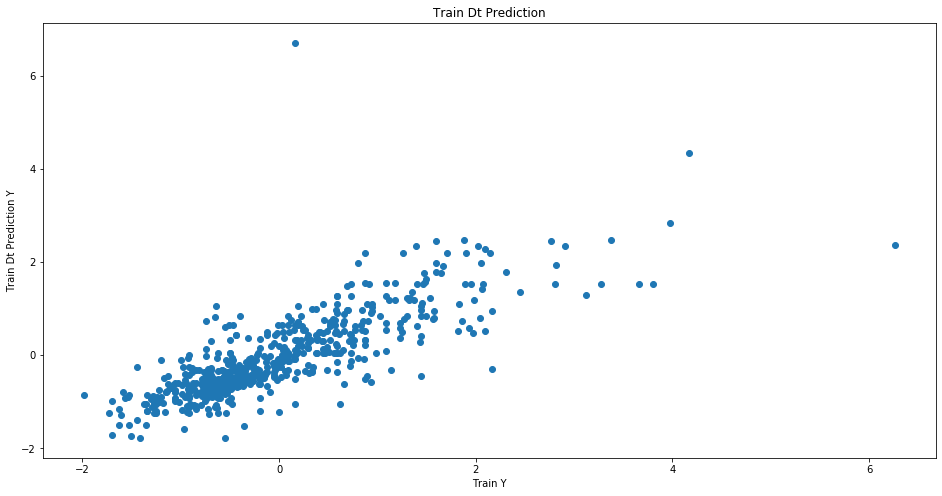

In [22]:
plt.figure(figsize=(16,8))
plt.scatter(y_test,train_dt_predict)
plt.xlabel('Train Y')
plt.ylabel('Train Dt Prediction Y')
plt.title('Train Dt Prediction')
plt.show()

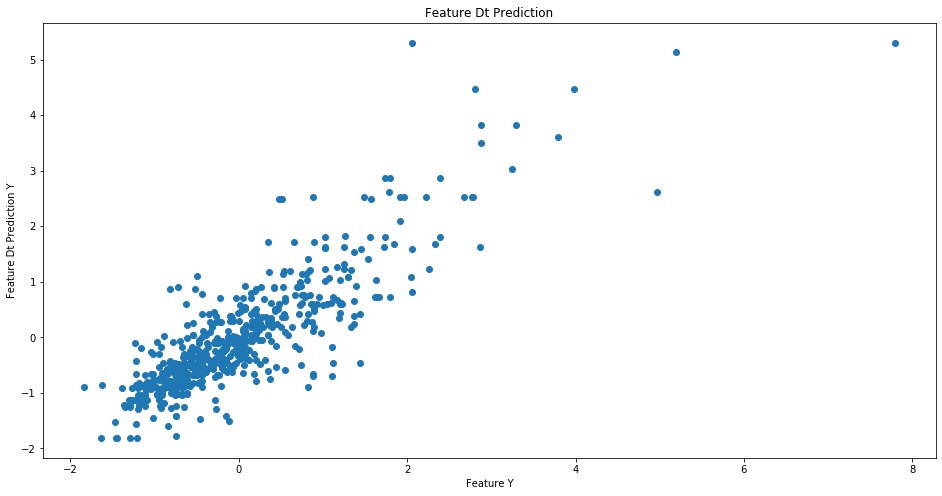

In [23]:
plt.figure(figsize=(16,8))
plt.scatter(y_feature_test,feature_dt_predict)
plt.xlabel('Feature Y')
plt.ylabel('Feature Dt Prediction Y')
plt.title('Feature Dt Prediction')
plt.show()

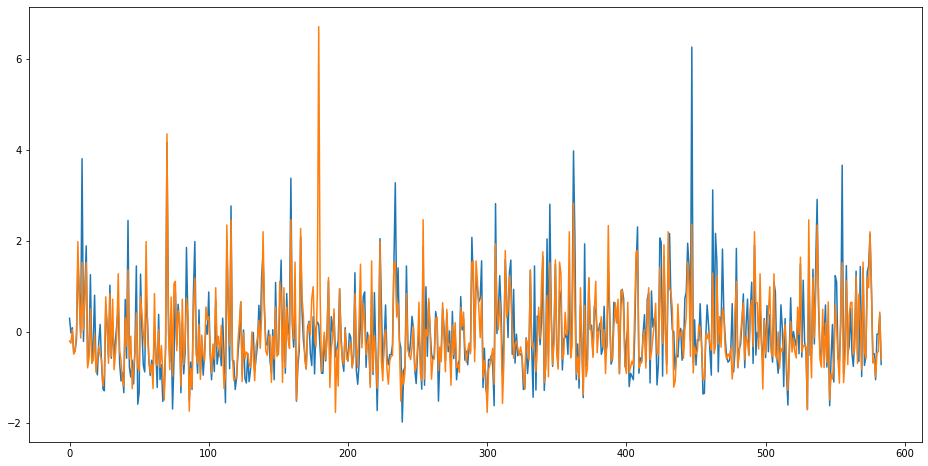

In [24]:
plt.figure(figsize=(16,8))
plt.plot(y_test,label = 'Train Dt')
plt.plot(train_dt_predict,label = 'Train Dt Prediction')
plt.show()

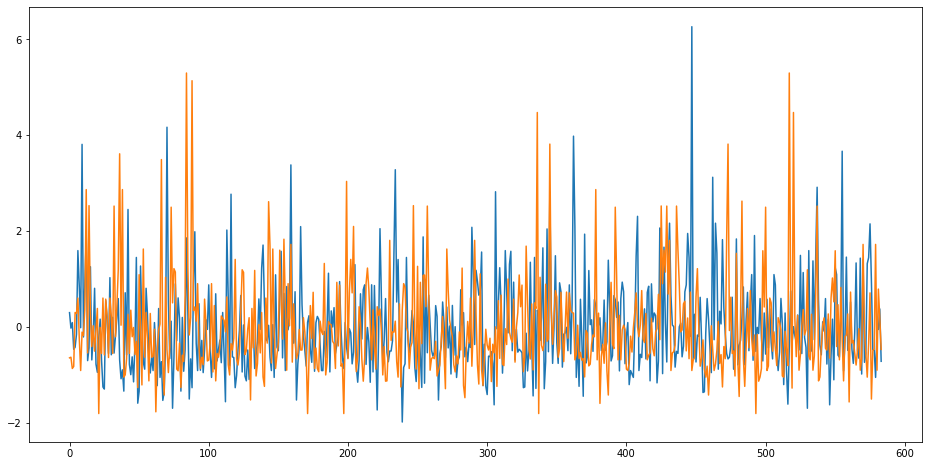

In [25]:
plt.figure(figsize=(16,8))
plt.plot(y_test,label = 'Feature Dt')
plt.plot(feature_dt_predict,label = 'Feature Dt Prediction')
plt.show()

Random Forest Tree

In [26]:
from sklearn.ensemble import RandomForestRegressor
import sys

train_rdt = RandomForestRegressor(n_estimators=200,random_state=0)
feature_rdt = RandomForestRegressor(n_estimators=200,random_state=0)

train_rdt.fit(x_train,y_train.ravel())
feature_rdt.fit(x_feature_train,y_feature_train.ravel())

train_rdt_predict = train_rdt.predict(x_test)
feature_rdt_predict = feature_rdt.predict(x_feature_test)

print('train_rdt_predict MAE:', metrics.mean_squared_error(y_test,train_rdt_predict))
print('train_rdt_predict RMAE:',np.sqrt(metrics.mean_squared_error(y_test,train_rdt_predict)))
print('feature_rdt_predict MAE:',metrics.mean_squared_error(y_feature_test,feature_rdt_predict))
print('feature_rdt_predict RMAE:',np.sqrt(metrics.mean_squared_error(y_feature_test,feature_rdt_predict)))

train_rdt_predict MAE: 0.17097123516117663
train_rdt_predict RMAE: 0.4134866807542616
feature_rdt_predict MAE: 0.18435847883241774
feature_rdt_predict RMAE: 0.4293698625106538


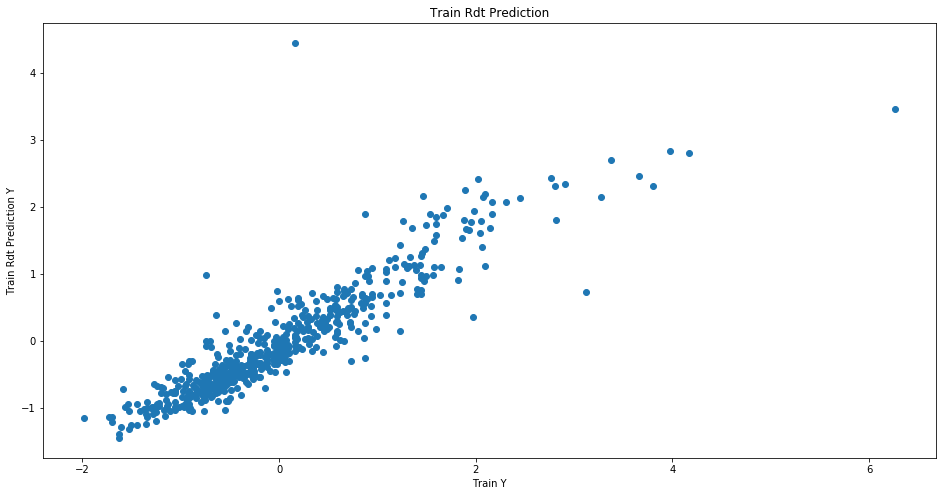

In [27]:
plt.figure(figsize=(16,8))
plt.scatter(y_test,train_rdt_predict)
plt.xlabel('Train Y')
plt.ylabel('Train Rdt Prediction Y')
plt.title('Train Rdt Prediction')
plt.show()

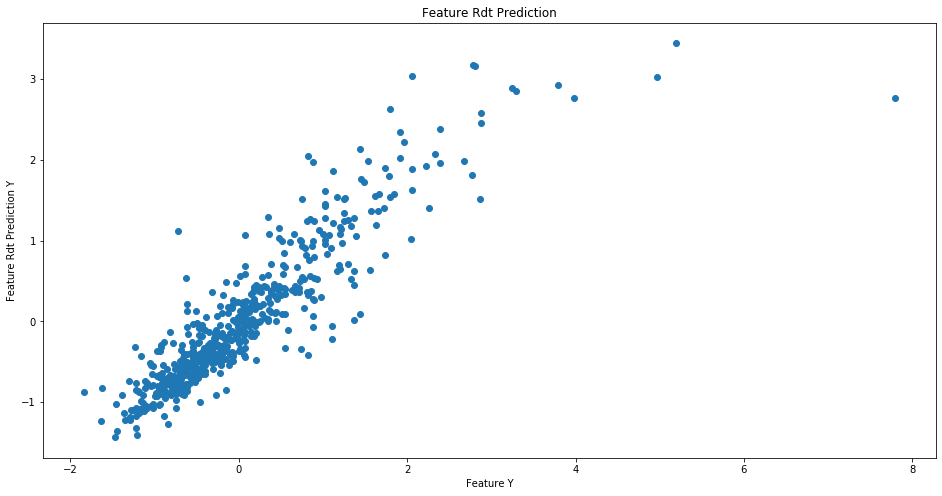

In [28]:
plt.figure(figsize=(16,8))
plt.scatter(y_feature_test,feature_rdt_predict)
plt.xlabel('Feature Y')
plt.ylabel('Feature Rdt Prediction Y')
plt.title('Feature Rdt Prediction')
plt.show()

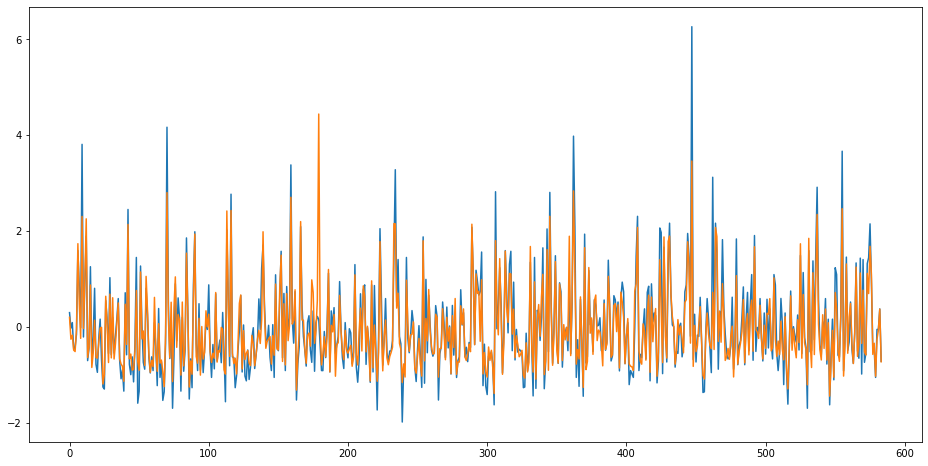

In [29]:
plt.figure(figsize=(16,8))
plt.plot(y_test,label = 'Train Rdt')
plt.plot(train_rdt_predict,label = 'Train Rdt Prediction')
plt.show()

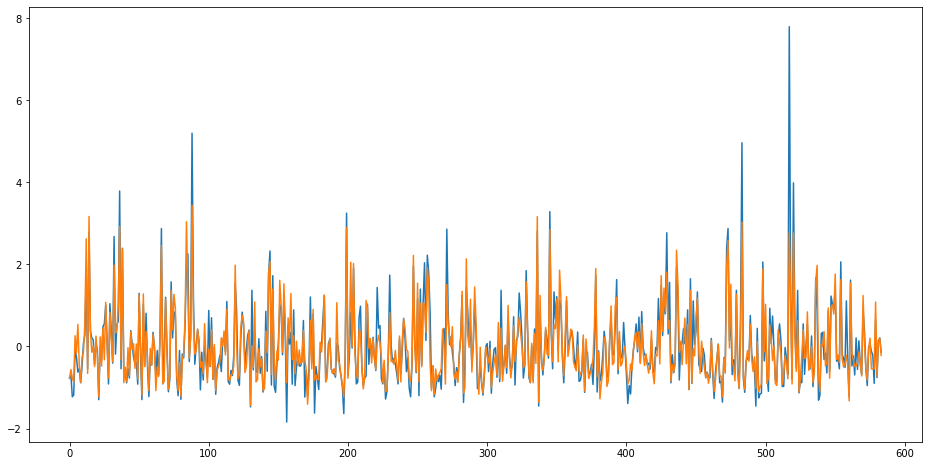

In [30]:
plt.figure(figsize=(16,8))
plt.plot(y_feature_test,label = 'Feature Rdt')
plt.plot(feature_rdt_predict,label = 'Feature Rdt Prediction')
plt.show()

SVM

In [31]:
from sklearn.svm import SVR

train_svr = SVR()
feature_svr = SVR()

train_svr.fit(x_train,y_train.ravel())
feature_svr.fit(x_feature_train,y_feature_train.ravel())

train_svr_predict = train_svr.predict(x_test)
feature_svr_predict = feature_svr.predict(x_feature_test)

print('train_rdt_predict MAE:', metrics.mean_squared_error(y_test,train_svr_predict))
print('train_rdt_predict RMAE:',np.sqrt(metrics.mean_squared_error(y_test,train_svr_predict)))
print('feature_rdt_predict MAE:',metrics.mean_squared_error(y_feature_test,feature_svr_predict))
print('feature_rdt_predict RMAE:',np.sqrt(metrics.mean_squared_error(y_feature_test,feature_svr_predict)))

train_rdt_predict MAE: 0.1849881742749588
train_rdt_predict RMAE: 0.4301025160063108
feature_rdt_predict MAE: 0.23161764222310052
feature_rdt_predict RMAE: 0.4812667059158576


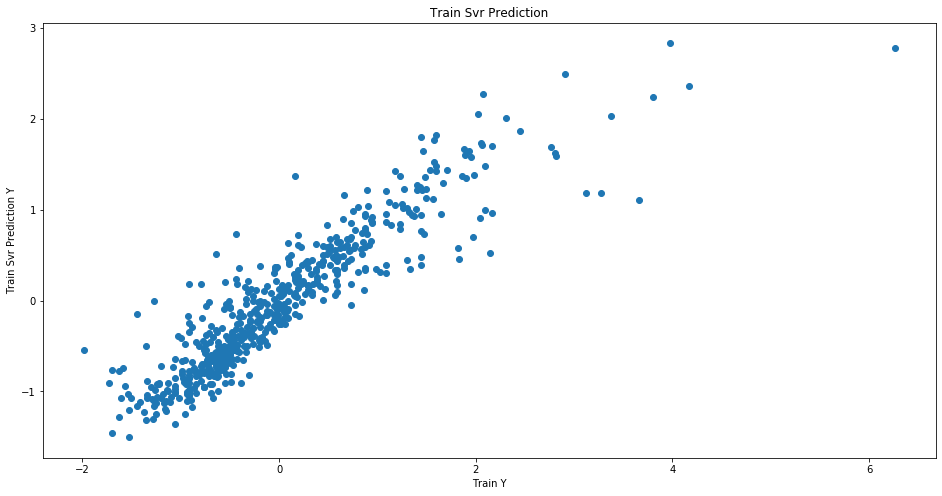

In [32]:
plt.figure(figsize=(16,8))
plt.scatter(y_test,train_svr_predict)
plt.xlabel('Train Y')
plt.ylabel('Train Svr Prediction Y')
plt.title('Train Svr Prediction')
plt.show()

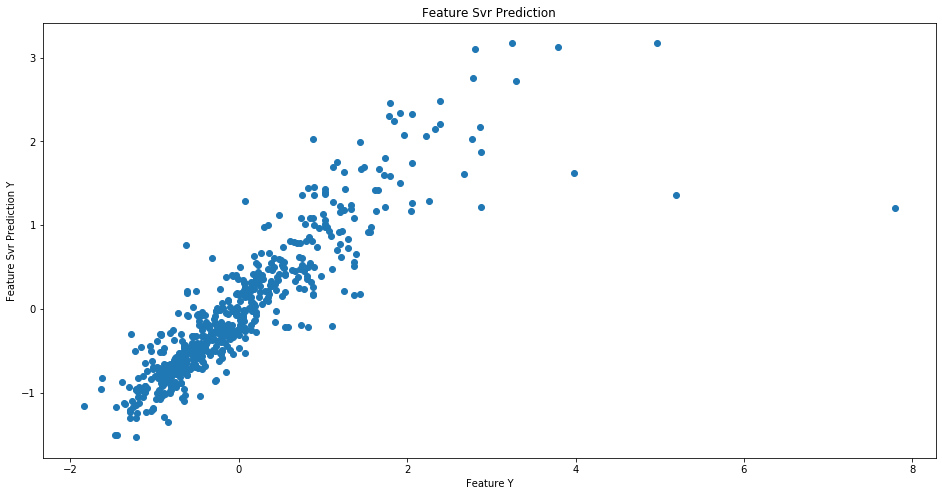

In [33]:
plt.figure(figsize=(16,8))
plt.scatter(y_feature_test,feature_svr_predict)
plt.xlabel('Feature Y')
plt.ylabel('Feature Svr Prediction Y')
plt.title('Feature Svr Prediction')
plt.show()

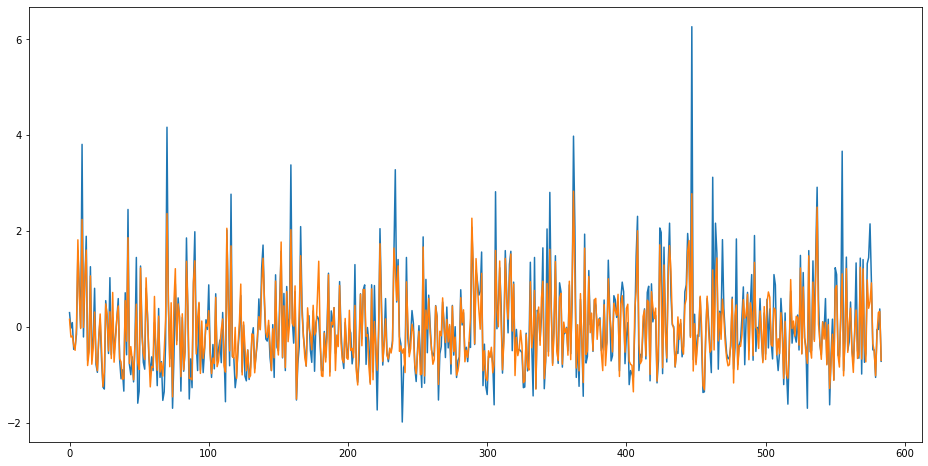

In [34]:
plt.figure(figsize=(16,8))
plt.plot(y_test,label = 'Train Svm')
plt.plot(train_svr_predict,label = 'Train Svm Prediction')
plt.show()

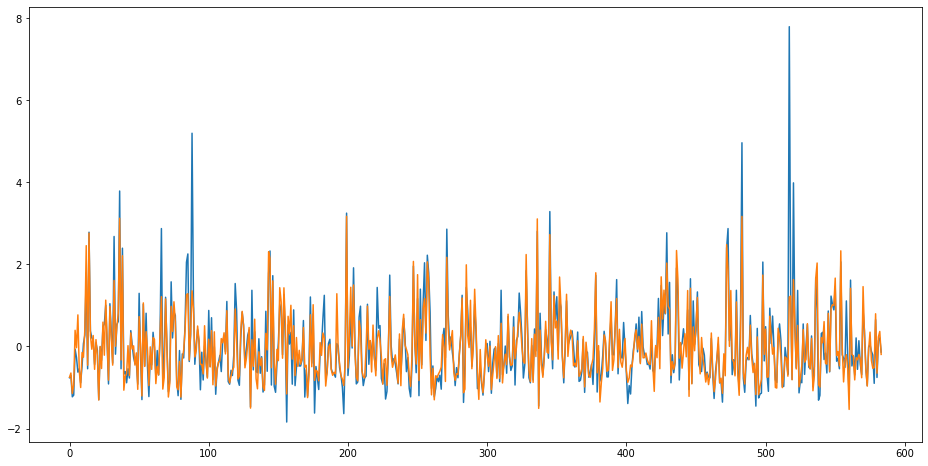

In [35]:
plt.figure(figsize=(16,8))
plt.plot(y_feature_test,label = 'Feature Svm')
plt.plot(feature_svr_predict,label = 'Feature Svm Prediction')
plt.show()

XGboost

In [36]:
from sklearn import ensemble
from sklearn.utils import shuffle

params = {'n_estimators':500, 'max_depth': 4, 'min_samples_split': 3, 'learning_rate': 0.01, 'loss': 'ls'}
train_clf = ensemble.GradientBoostingRegressor(**params)
feature_clf = ensemble.GradientBoostingRegressor(**params)

train_clf.fit(x_train,y_train.ravel())
feature_clf.fit(x_feature_train,y_feature_train.ravel())

train_clf_predict = train_clf.predict(x_test)
feature_clf_predict = feature_clf.predict(x_feature_test)

print('train_rdt_predict MAE:', metrics.mean_squared_error(y_test,train_clf_predict))
print('train_rdt_predict RMAE:',np.sqrt(metrics.mean_squared_error(y_test,train_clf_predict)))
print('feature_rdt_predict MAE:',metrics.mean_squared_error(y_feature_test,feature_clf_predict))
print('feature_rdt_predict RMAE:',np.sqrt(metrics.mean_squared_error(y_feature_test,feature_clf_predict)))

train_rdt_predict MAE: 0.157558118383406
train_rdt_predict RMAE: 0.3969359121865972
feature_rdt_predict MAE: 0.18367531611922797
feature_rdt_predict RMAE: 0.42857358308606464


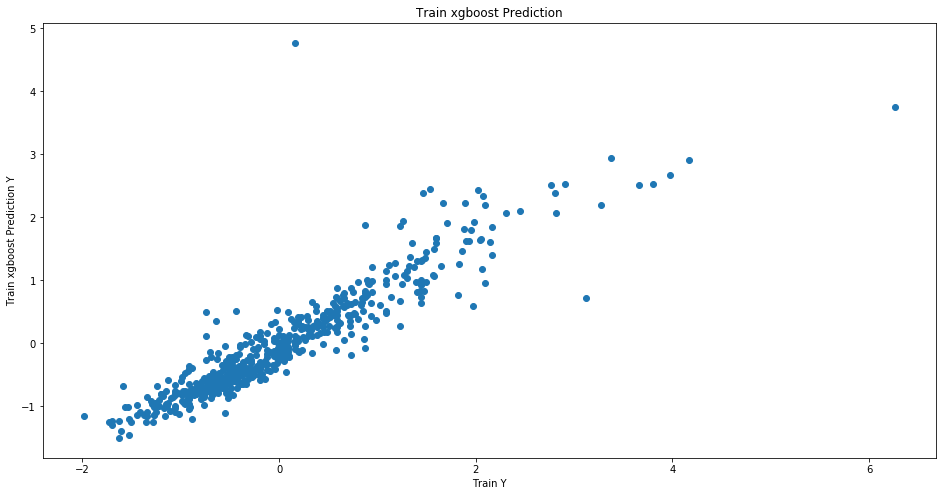

In [37]:
plt.figure(figsize=(16,8))
plt.scatter(y_test,train_clf_predict)
plt.xlabel('Train Y')
plt.ylabel('Train xgboost Prediction Y')
plt.title('Train xgboost Prediction')
plt.show()

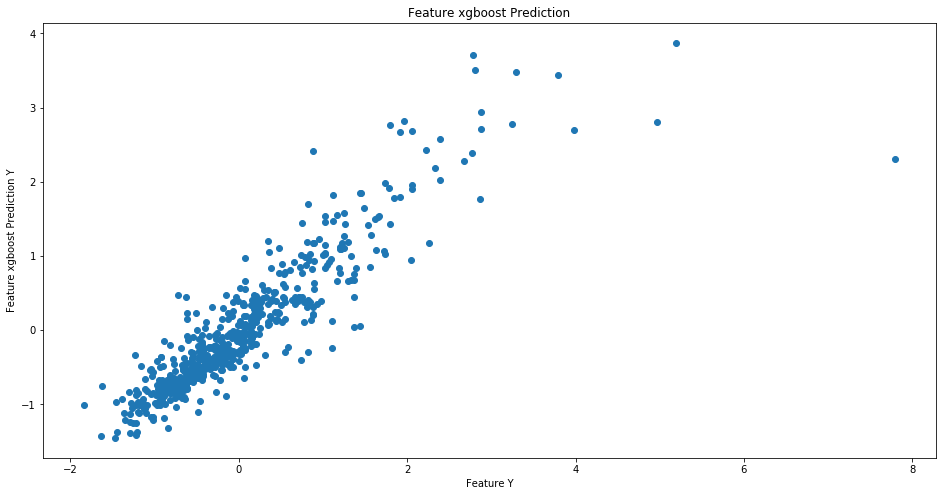

In [38]:
plt.figure(figsize=(16,8))
plt.scatter(y_feature_test,feature_clf_predict)
plt.xlabel('Feature Y')
plt.ylabel('Feature xgboost Prediction Y')
plt.title('Feature xgboost Prediction')
plt.show()

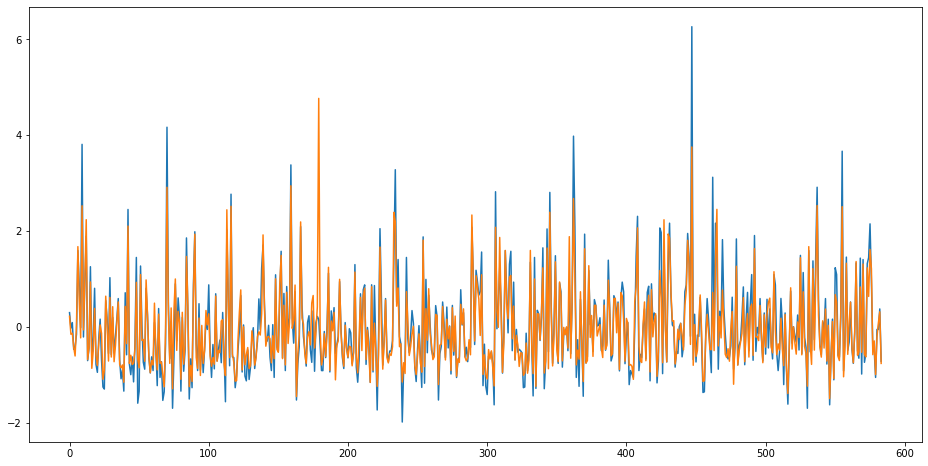

In [39]:
plt.figure(figsize=(16,8))
plt.plot(y_test,label = 'Train xgboost')
plt.plot(train_clf_predict,label = 'Train xgboost Prediction')
plt.show()

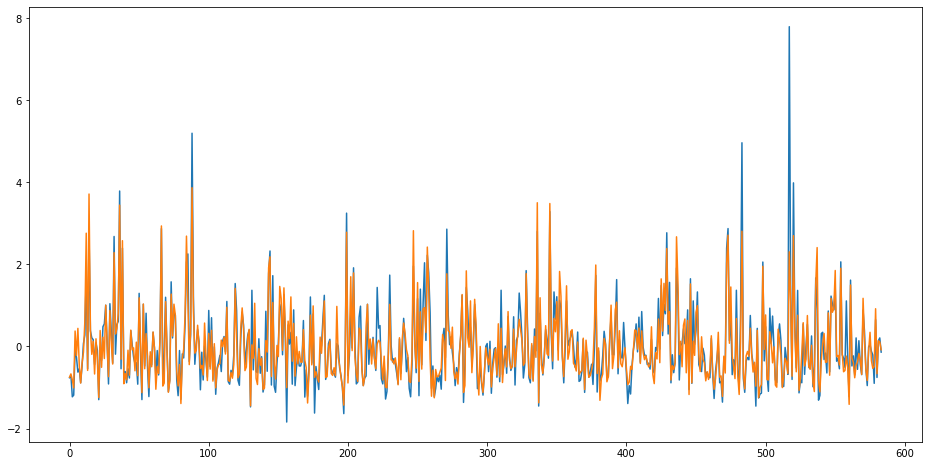

In [40]:
plt.figure(figsize=(16,8))
plt.plot(y_feature_test,label = 'Feature xgboost')
plt.plot(feature_clf_predict,label = 'Feature xgboost Prediction')
plt.show()

LightGBM

In [41]:
import lightgbm as lgb

train_lgb = lgb.LGBMRegressor(object='regression',n_estimators=1000,learning_rate=0.01,num_leaves=20)
feature_lgb = lgb.LGBMRegressor(object='regression',n_estimators=1000,learning_rate=0.01,num_leaves=20)

train_lgb.fit(x_train,y_train.ravel())
feature_lgb.fit(x_feature_train,y_feature_train.ravel())

train_lgb_predict = train_lgb.predict(x_test)
feature_lgb_predict = feature_lgb.predict(x_feature_test)

print('train_rdt_predict MAE:', metrics.mean_squared_error(y_test,train_lgb_predict))
print('train_rdt_predict RMAE:',np.sqrt(metrics.mean_squared_error(y_test,train_lgb_predict)))
print('feature_rdt_predict MAE:',metrics.mean_squared_error(y_feature_test,feature_lgb_predict))
print('feature_rdt_predict RMAE:',np.sqrt(metrics.mean_squared_error(y_feature_test,feature_lgb_predict)))



train_rdt_predict MAE: 0.15000585604915334
train_rdt_predict RMAE: 0.38730589467390414
feature_rdt_predict MAE: 0.1708169206953753
feature_rdt_predict RMAE: 0.4133000371344954


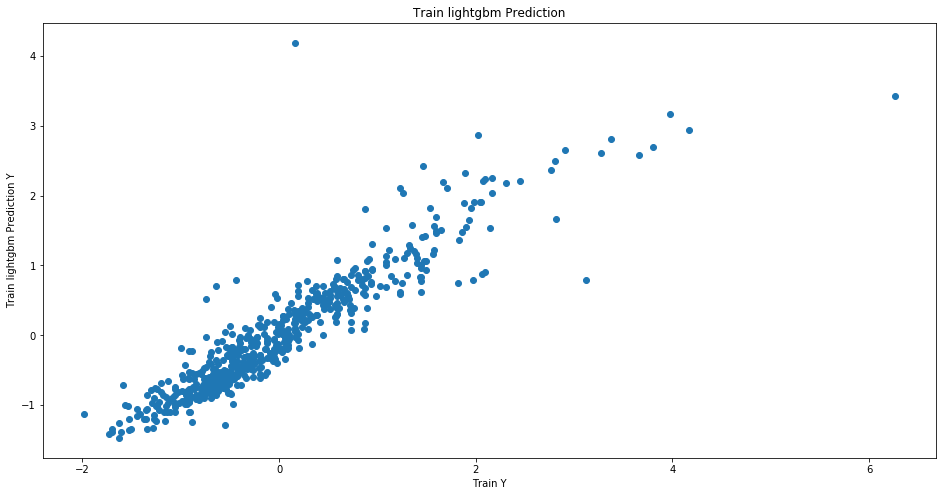

In [42]:
plt.figure(figsize=(16,8))
plt.scatter(y_test,train_lgb_predict)
plt.xlabel('Train Y')
plt.ylabel('Train lightgbm Prediction Y')
plt.title('Train lightgbm Prediction')
plt.show()

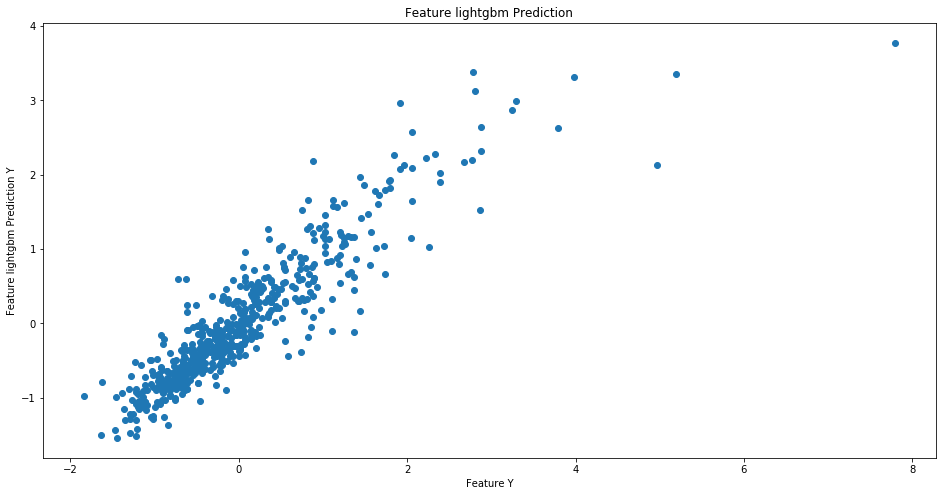

In [45]:
plt.figure(figsize=(16,8))
plt.scatter(y_feature_test,feature_lgb_predict)
plt.xlabel('Feature Y')
plt.ylabel('Feature lightgbm Prediction Y')
plt.title('Feature lightgbm Prediction')
plt.show()

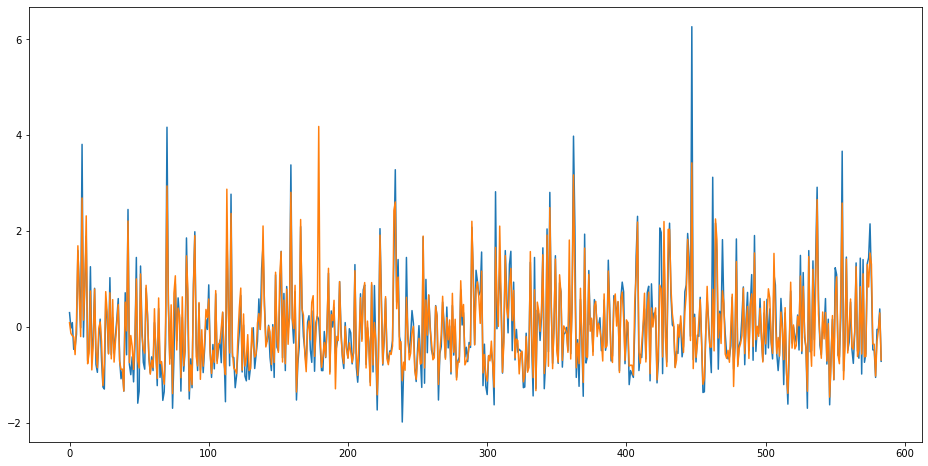

In [46]:
plt.figure(figsize=(16,8))
plt.plot(y_test,label = 'Train lightgbm')
plt.plot(train_lgb_predict,label = 'Train lightgbm Prediction')
plt.show()

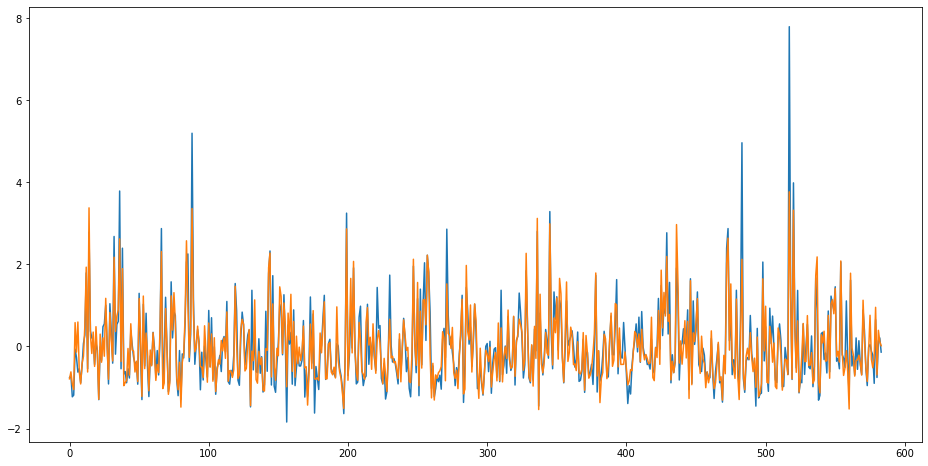

In [47]:
plt.figure(figsize=(16,8))
plt.plot(y_feature_test,label = 'Feature lightgbm')
plt.plot(feature_lgb_predict,label = 'Feature lightgbm Prediction')
plt.show()

We throw the linear regression's result because it has huge difference to other methods' results. We can see random forest tree is much better than decision tree. And random forest tree has higher accuracy when it accept more features. We can see random forest tree, svm, xgboost and lightboost are almost same about accuracy.

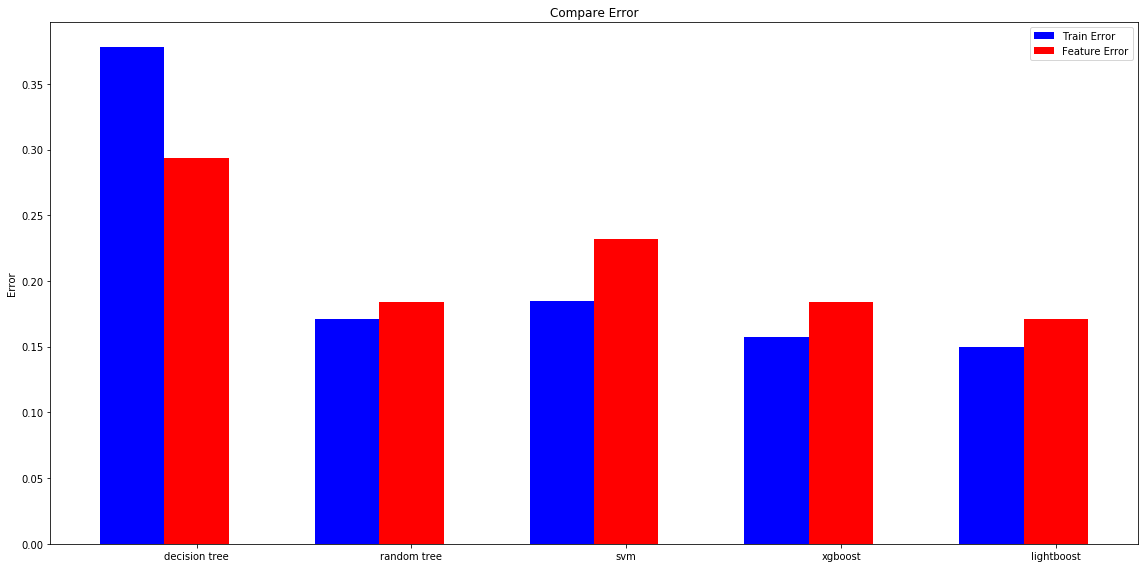

In [48]:
labels = ('decision tree','random tree','svm','xgboost','lightboost')
train_error = (metrics.mean_squared_error(y_test,train_dt_predict),
               metrics.mean_squared_error(y_test,train_rdt_predict),metrics.mean_squared_error(y_test,train_svr_predict),
               metrics.mean_squared_error(y_test,train_clf_predict),metrics.mean_squared_error(y_test,train_lgb_predict))
feature_error = (metrics.mean_squared_error(y_feature_test,feature_dt_predict),
                 metrics.mean_squared_error(y_feature_test,feature_rdt_predict),metrics.mean_squared_error(y_feature_test,feature_svr_predict),
                 metrics.mean_squared_error(y_feature_test,feature_clf_predict),metrics.mean_squared_error(y_feature_test,feature_lgb_predict))

x = np.arange(len(labels))
width = 0.3

plt.figure(figsize=(16,8))
plt.bar(x, train_error, width = width, color = 'blue', label = 'Train Error')
plt.bar(x + width,feature_error, width = width, color = 'red', label = 'Feature Error')

plt.ylabel('Error')
plt.title('Compare Error')
plt.xticks(x + width,labels)
plt.legend()

plt.tight_layout()
plt.show()